**Recommender System: Multi-Model Introduction:**

This script trains a sequential recommender system on a **user-specified/customizable** MovieLens dataset (100K, 1M, 10M, or 20M).

It preprocesses the data, maps user/item IDs, and splits interactions into train/validation/test sequences.

Users can select among four models: **standard LSTM, xLSTM, BERT4REC, SAS4REC** variant with configurable parameters.

The selected model is trained using PyTorch with evaluation metrics like Recall@10, MRR, Hit Rate and NDCG.

After training, the best model is used to predict and display top-10 movie recommendations based on user history.

Training script that integrates:

✅ Dynamic dataset selection (100K, 1M, 10M, 20M)

✅ Multiple model choices (LSTM, xLSTM, BERT4Rec, SASRec)

✅ Dataset-specific hyperparameters (xlstm_params, dataloader_params)

✅ TensorBoard logging

✅ GPU monitoring

✅ Evaluation metrics (Recall@10, MRR, NDCG)

✅ Early stopping + best model saving

✅ Easy-readable prediction logging with movie titles

# Initial Setup Requirements (For New Users)

A. Install Necessary Packages (in quite mode)

B. Triton Activation For GPU Acceleration (To make sure Triton and GPU Accerleration, to speed up the training process)

C. Select the necessary model and datasets (Model)

D. Run all would work, to change the model and datasets, please adjust the variable in the main script.

E. Script is mainly desinged for Colab Environment, for A100 GPU. Single click solution.

In [1]:
# Check the latest Python Version, not needed everytime but to ensure if any updates
import json
import urllib.request

def get_latest_version(package_name):
    url = f"https://pypi.org/pypi/{package_name}/json"
    with urllib.request.urlopen(url) as r:
        data = json.load(r)
    return data["info"]["version"]

packages = ["mlstm_kernels", "xlstm", "torch", "torchvision", "torchaudio"]
for pkg in packages:
    print(f"{pkg}: {get_latest_version(pkg)}")

mlstm_kernels: 2.0.0
xlstm: 2.0.4
torch: 2.7.1
torchvision: 0.22.1
torchaudio: 2.7.1


In [2]:
import subprocess

# List of packages with exact versions
pkgs = [
    "mlstm_kernels==2.0.0",
    "xlstm==2.0.4",
    "torch==2.7.1",
    "torchvision==0.22.1",
    "torchaudio==2.7.1"
]

# Install with CUDA 12.1 index URL and no output
subprocess.run([
    "pip", "install", "--upgrade", *pkgs,
    "--index-url", "https://download.pytorch.org/whl/cu121"
], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

print("✅ Installed: mlstm_kernels==2.0.0, xlstm==2.0.4, torch==2.7.1, torchvision==0.22.1, torchaudio==2.7.1")

✅ Installed: mlstm_kernels==2.0.0, xlstm==2.0.4, torch==2.7.1, torchvision==0.22.1, torchaudio==2.7.1


In [3]:
# # 🧩 Install model kernel dependencies
# !pip install -q mlstm_kernels==2.0.0 xlstm==2.0.4

# # ⚙️ Install specific PyTorch + CUDA 12.1 compatible versions
# !pip install -q torch==2.7.1 torchvision==0.22.1 torchaudio==2.7.1 --index-url https://download.pytorch.org/whl/cu121

# print("[✅] Successfully Installed: mlstm_kernels==2.0.0, xlstm==2.0.4, torch==2.7.1, torchvision==0.22.1, torchaudio==2.7.1")

In [4]:
# PyTorch with Triton 3.1.0
# !pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [14]:
!pip install -q xlstm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [6]:
!mkdir -p /usr/local/lib
!ln -sf /usr/lib64-nvidia/libcuda.so /usr/local/lib/libcuda.so

In [7]:
!find /usr -name "build.py" | grep triton

/usr/local/lib/python3.11/dist-packages/triton/runtime/build.py


In [8]:
path = "/usr/local/lib/python3.11/dist-packages/triton/runtime/build.py"

with open(path, "r") as f:
    lines = f.readlines()

patched_lines = []
for line in lines:
    if "dirs = [" in line:
        patched_lines.append('    dirs = ["/usr/lib64-nvidia", "/usr/local/lib"]  # patched\n')
    elif "assert any(os.path.exists(" in line:
        patched_lines.append('    # assertion disabled for libcuda.so\n')
    else:
        patched_lines.append(line)

with open(path, "w") as f:
    f.writelines(patched_lines)

print("✅ GPU Check 1: Triton 3.1.0 patched for Colab CUDA.")


✅ GPU Check 1: Triton 3.1.0 patched for Colab CUDA.


In [9]:
import os
os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

import triton
import triton.language as tl
import torch

@triton.jit
def add_kernel(X_ptr, Y_ptr, Z_ptr, N: tl.constexpr):
    pid = tl.program_id(0)
    if pid >= N:
        return
    x = tl.load(X_ptr + pid)
    y = tl.load(Y_ptr + pid)
    tl.store(Z_ptr + pid, x + y)

# Test kernel
size = 1024
X = torch.rand(size, device='cuda')
Y = torch.rand(size, device='cuda')
Z = torch.empty(size, device='cuda')

add_kernel[(size,)](X, Y, Z, N=size)
print("✅ GPU Check 2: Triton 3.x kernel executed successfully!")
print(Z[:5])

✅ GPU Check 2: Triton 3.x kernel executed successfully!
tensor([1.5076, 1.0671, 0.6514, 1.0207, 0.4698], device='cuda:0')


In [10]:
# Mount it to Drive, for longer training
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Just in case of Error:
# import os
# os.kill(os.getpid(), 9)

# Select your Model Here:

In [15]:
MOVIELENS_VERSION = "100K"  # Choose from "100K","1M","10M","20M"
MODEL_SELECTION = "BERT4Rec"  # "LSTM", "xLSTM", "BERT4Rec", "SASRec"
EPOCHS = 50
MAX_LEN = 50

# Run the Main Script after selection

Output Section 1: Initialization
[INFO] Model initialized. Triton should log kernel compilation now.
[GPU MONITOR] 0% GPU, 501 MiB
Extraction complete.
-------------------------
Output Section 2: Important Parameters and Model Selection
Model: BERT4Rec
Dataset: 100K
MAX_LEN: 50, BATCH_SIZE: 256, LEARNING_RATE: 0.001
Model Params (100K): {'embedding_dim': 64, 'num_heads': 2, 'num_blocks': 1}
Dataloader Params (100K): {'batch_size': 128, 'num_workers': 2}
Length of ratings: 100000
Shape: (100000, 31)
Num users: 943, Num items: 1682
Length of the ratings: 100000
Shape of the ratings dataframe: (100000, 31)
-------------------------
                  
Output Section 3: Input Datasets For Reference
   user_id  movie_id  rating  timestamp  age gender  occupation zip_code  \
0        0         0       5  874965478   24      M  technician    85711   
1        0         1       5  874965478   24      M  technician    85711   
2        0         2       5  874965518   24      M  technician    85

Epoch 1: 100%|██████████| 760/760 [00:05<00:00, 126.80it/s]


Epoch 1 | Loss: 4882.65 | HR@10: 0.1071 (101/943) | Recall@10: 0.1071 | MRR@10: 0.0321 | NDCG@10: 0.0492
Saved new best model (Recall@10 = 0.1071) to /content/drive/MyDrive/Colab Notebook/RC/Results/best_model_100K_BERT4Rec_SL:50_Emb:64.pt


Epoch 2: 100%|██████████| 760/760 [00:04<00:00, 154.64it/s]


Epoch 2 | Loss: 4445.72 | HR@10: 0.1241 (117/943) | Recall@10: 0.1241 | MRR@10: 0.0422 | NDCG@10: 0.0611
Saved new best model (Recall@10 = 0.1241) to /content/drive/MyDrive/Colab Notebook/RC/Results/best_model_100K_BERT4Rec_SL:50_Emb:64.pt


Epoch 3: 100%|██████████| 760/760 [00:04<00:00, 154.71it/s]


Epoch 3 | Loss: 4287.89 | HR@10: 0.1230 (116/943) | Recall@10: 0.1230 | MRR@10: 0.0404 | NDCG@10: 0.0595
 No improvement for 1 epoch(s)


Epoch 4: 100%|██████████| 760/760 [00:04<00:00, 154.85it/s]


Epoch 4 | Loss: 4172.80 | HR@10: 0.1304 (123/943) | Recall@10: 0.1304 | MRR@10: 0.0503 | NDCG@10: 0.0686
Saved new best model (Recall@10 = 0.1304) to /content/drive/MyDrive/Colab Notebook/RC/Results/best_model_100K_BERT4Rec_SL:50_Emb:64.pt


Epoch 5: 100%|██████████| 760/760 [00:04<00:00, 156.49it/s]


Epoch 5 | Loss: 4086.03 | HR@10: 0.1315 (124/943) | Recall@10: 0.1315 | MRR@10: 0.0433 | NDCG@10: 0.0635
Saved new best model (Recall@10 = 0.1315) to /content/drive/MyDrive/Colab Notebook/RC/Results/best_model_100K_BERT4Rec_SL:50_Emb:64.pt


Epoch 6: 100%|██████████| 760/760 [00:05<00:00, 150.59it/s]


Epoch 6 | Loss: 4016.86 | HR@10: 0.1304 (123/943) | Recall@10: 0.1304 | MRR@10: 0.0417 | NDCG@10: 0.0621
 No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 760/760 [00:04<00:00, 155.44it/s]


Epoch 7 | Loss: 3962.64 | HR@10: 0.1262 (119/943) | Recall@10: 0.1262 | MRR@10: 0.0445 | NDCG@10: 0.0633
 No improvement for 2 epoch(s)


Epoch 8: 100%|██████████| 760/760 [00:04<00:00, 155.65it/s]


Epoch 8 | Loss: 3914.81 | HR@10: 0.1262 (119/943) | Recall@10: 0.1262 | MRR@10: 0.0426 | NDCG@10: 0.0620
 No improvement for 3 epoch(s)

 Early stopping triggered. No improvement for 3 consecutive epochs.

 Loading best model from: /content/drive/MyDrive/Colab Notebook/RC/Results/best_model_100K_BERT4Rec_SL:50_Emb:64.pt

--------------------
Output Section 6: Performance Metrics


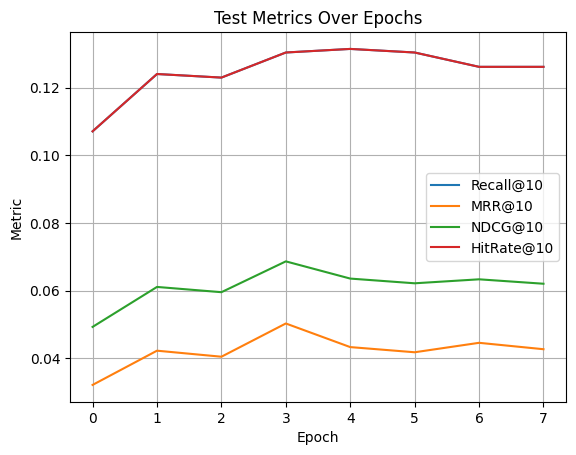

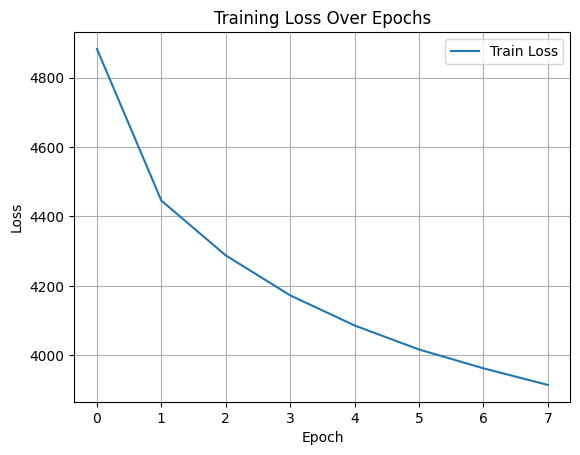


Total run time: 0.88 minutes

--------------------
Output Section 7: Sample Predictions

User ID: 3
Input sequence:
  - Item 194: Jurassic Park (1993)
  - Item 638: Crucible, The (1996)
  - Item 64: Silence of the Lambs, The (1991)
  - Item 245: Wrong Trousers, The (1993)
  - Item 55: Forrest Gump (1994)
  - Item 46: What's Eating Gilbert Grape (1993)
  - Item 262: This Is Spinal Tap (1984)
  - Item 214: Indiana Jones and the Last Crusade (1989)
  - Item 17: Star Wars (1977)
  - Item 239: Star Trek: The Wrath of Khan (1982)
  - Item 544: Rear Window (1954)
  - Item 28: Twelve Monkeys (1995)
  - Item 61: Clockwork Orange, A (1971)
  - Item 54: Alien (1979)
  - Item 377: Butch Cassidy and the Sundance Kid (1969)
  - Item 70: Blade Runner (1982)
  - Item 680: Piano, The (1993)
  - Item 267: Truth About Cats & Dogs, The (1996)
  - Item 694: Strictly Ballroom (1992)
  - Item 1458: Bye Bye, Love (1995)
  - Item 475: Annie Hall (1977)
  - Item 558: Stand by Me (1986)
  - Item 242: Fargo (199

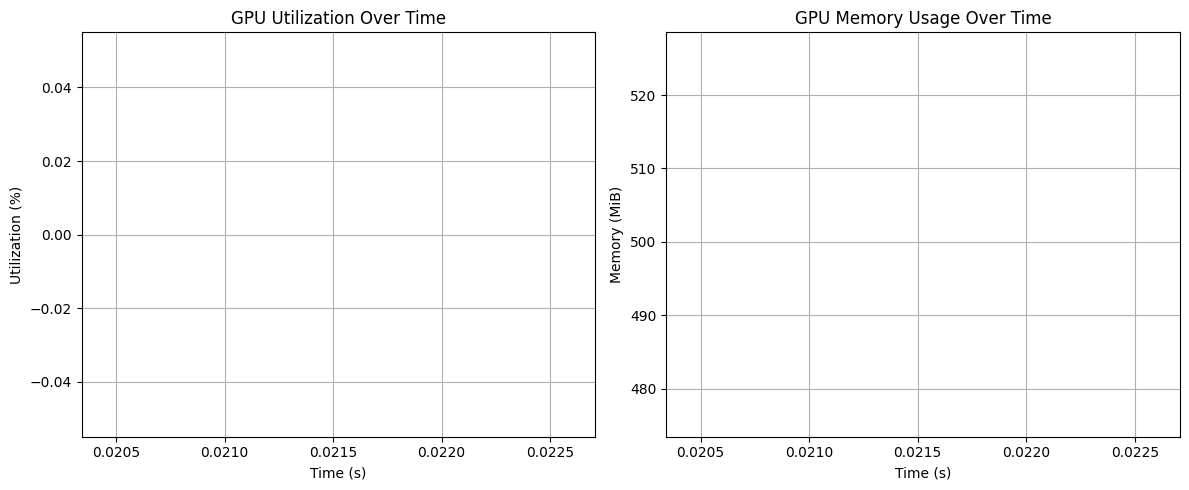


 Loading best model from: /content/drive/MyDrive/Colab Notebook/RC/Results/best_model_100K_BERT4Rec_SL:50_Emb:64.pt 100KBERT4Rec
Completed


In [16]:
# Main Script

import os, sys, zipfile, requests, threading, subprocess, time, random, warnings
import pandas as pd, numpy as np
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import matplotlib.pyplot as plt
from xlstm.xlstm_large.model import xLSTMLargeConfig, xLSTMLarge

warnings.filterwarnings("ignore")

BATCH_SIZE = 256
LEARNING_RATE = 1e-3

os.environ["TRITON_DEBUG"] = "1"
print("Output Section 1: Initialization")
print("[INFO] Model initialized. Triton should log kernel compilation now.")

# import os
# # Required for Triton to run correctly in Colab
# os.environ["TRITON_DEBUG"] = "1"
os.environ["LD_LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["LIBRARY_PATH"] = "/usr/lib64-nvidia:/usr/local/lib"
os.environ["PATH"] += ":/usr/local/lib"

start_time = time.time()

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import threading
import subprocess
import time

gpu_utilization_log = []
gpu_memory_log = []
gpu_time_log = []


def monitor_gpu(interval=120):
    while True:
        output = subprocess.getoutput(
            "nvidia-smi --query-gpu=utilization.gpu,memory.used --format=csv,noheader,nounits"
        )
        util, mem = map(int, output.strip().split(','))
        gpu_utilization_log.append(util)
        gpu_memory_log.append(mem)
        gpu_time_log.append(time.time() - start_time)
        print(f"[GPU MONITOR] {util}% GPU, {mem} MiB")
        time.sleep(interval)

# Start GPU monitor thread
# monitor_thread = threading.Thread(target=monitor_gpu, daemon=True)
monitor_thread = threading.Thread(target=monitor_gpu, args=(120,), daemon=True)

monitor_thread.start()

train_seqs = {}
val_seqs = {}
test_seqs = {}

step_counter = 1
logged_users = set()
max_print_users = 5
log_lines = []
log_file_path = "training_logs.txt"


sys.path.append("../..")


# -----------------------------
# 1. Select MovieLens Dataset
# -----------------------------

dataset_urls = {
    "100K": "https://files.grouplens.org/datasets/movielens/ml-100k.zip",
    "1M": "https://files.grouplens.org/datasets/movielens/ml-1m.zip",
    "10M": "https://files.grouplens.org/datasets/movielens/ml-10m.zip",
    "20M": "https://files.grouplens.org/datasets/movielens/ml-20m.zip"
}

dataset_dirs = {
    "100K": "ml-100k",
    "1M": "ml-1m",
    "10M": "ml-10M100K",
    "20M": "ml-20m"
}

xlstm_params = {
    "100K": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
    "1M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
    "10M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
    "20M": {"embedding_dim": 256, "num_heads": 8, "num_blocks": 4}
}

# xlstm_params = {
#     "100K": {"embedding_dim": 64, "num_heads": 2, "num_blocks": 1},
#     "1M": {"embedding_dim": 96, "num_heads": 2, "num_blocks": 2},
#     "10M": {"embedding_dim": 128, "num_heads": 2, "num_blocks": 2},
#     "20M": {"embedding_dim": 256, "num_heads": 8, "num_blocks": 4}
# }

dataloader_params = {
    "100K": {"batch_size": 128, "num_workers": 2},
    "1M": {"batch_size": 128, "num_workers": 2},
    "10M": {"batch_size": 1024, "num_workers": 2},
    "20M": {"batch_size": 1024, "num_workers": 2}
}

# dataloader_params = {
#     "100K": {"batch_size": 128, "num_workers": 2},
#     "1M": {"batch_size": 256, "num_workers": 2},
#     "10M": {"batch_size": 1024, "num_workers": 2},
#     "20M": {"batch_size": 1024, "num_workers": 2}
# }


# ------------------------------
# TensorBoard
# ------------------------------
# log_dir = f"runs/{MODEL_SELECTION}_{MOVIELENS_VERSION}_{EPOCHS}_{int(time.time())}"
params = xlstm_params[MOVIELENS_VERSION]  # dynamically get config

log_dir = f"runs/{MODEL_SELECTION}_{MOVIELENS_VERSION}_SL:{MAX_LEN}_Emb:{params['embedding_dim']}"

output_dir = "/content/drive/MyDrive/Colab Notebook/RC/Results"
os.makedirs(output_dir, exist_ok=True)

# Save path for model
save_path = os.path.join(
    output_dir,
    f"best_model_{MOVIELENS_VERSION}_{MODEL_SELECTION}_SL:{MAX_LEN}_Emb:{params['embedding_dim']}.pt"
)

# TensorBoard logging dir
log_dir = os.path.join(
    output_dir,
    f"runs/{MODEL_SELECTION}_{MOVIELENS_VERSION}_SL:{MAX_LEN}_Emb:{params['embedding_dim']}"
)

writer = SummaryWriter(log_dir=log_dir)


DATA_URL = dataset_urls[MOVIELENS_VERSION]
DATA_DIR = dataset_dirs[MOVIELENS_VERSION]

if not os.path.exists(DATA_DIR):
    print(f"Downloading MovieLens {MOVIELENS_VERSION} dataset...")
    r = requests.get(DATA_URL)
    zip_filename = f"{DATA_DIR}.zip"
    with open(zip_filename, "wb") as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Extraction complete.")

# -----------------------------
# 2. Load and Preprocess Data
# -----------------------------
if MOVIELENS_VERSION == "100K":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "u.data"), sep="\t", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "u.item"), sep='|', encoding='latin-1', header=None, engine='python',
                         names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
    users = pd.read_csv(os.path.join(DATA_DIR, "u.user"), sep='|', header=None,
                        names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "1M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.read_csv(os.path.join(DATA_DIR, "users.dat"), sep="::", engine='python',
                        names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])

elif MOVIELENS_VERSION == "10M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.dat"), sep="::", engine='python',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.dat"), sep="::", engine='python',
                         names=['movie_id', 'title', 'genres'], encoding='latin-1')
    users = pd.DataFrame({'user_id': rating_df['user_id'].unique()})  # No user metadata

elif MOVIELENS_VERSION == "20M":
    rating_df = pd.read_csv(os.path.join(DATA_DIR, "ratings.csv"))
    movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
    users = pd.DataFrame({'user_id': rating_df['userId'].unique()})  # No user metadata

    rating_df.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'}, inplace=True)
    movies.rename(columns={'movieId': 'movie_id'}, inplace=True)

# -----------------------------
# Map User and Item IDs
# -----------------------------
rating_df.sort_values(by=['user_id', 'timestamp'], inplace=True)
user2id = {uid: i for i, uid in enumerate(rating_df['user_id'].unique())}
item2id = {iid: i for i, iid in enumerate(rating_df['movie_id'].unique())}
rating_df['user_id'] = rating_df['user_id'].map(user2id)
rating_df['movie_id'] = rating_df['movie_id'].map(item2id)

movie_titles = {item2id[row['movie_id']]: row['title'] for _, row in movies.iterrows() if row['movie_id'] in item2id}

if 'user_id' in users.columns:
    users['user_id'] = users['user_id'].map(user2id)
    users.dropna(subset=['user_id'], inplace=True)
    users['user_id'] = users['user_id'].astype(int)

if 'movie_id' in movies.columns:
    movies['movie_id'] = movies['movie_id'].map(item2id)
    movies.dropna(subset=['movie_id'], inplace=True)
    movies['movie_id'] = movies['movie_id'].astype(int)

rating_df = rating_df.merge(users, on='user_id', how='left')
rating_df = rating_df.merge(movies, on='movie_id', how='left')

num_users = len(user2id)
num_items = len(item2id)

print("-------------------------")
print("Output Section 2: Important Parameters and Model Selection")

print(f"Model: {MODEL_SELECTION}")
print(f"Dataset: {MOVIELENS_VERSION}")
print(f"MAX_LEN: {MAX_LEN}, BATCH_SIZE: {BATCH_SIZE}, LEARNING_RATE: {LEARNING_RATE}")
print(f"Model Params ({MOVIELENS_VERSION}): {xlstm_params[MOVIELENS_VERSION]}")
print(f"Dataloader Params ({MOVIELENS_VERSION}): {dataloader_params[MOVIELENS_VERSION]}")

print(f"Length of ratings: {len(rating_df)}")
print(f"Shape: {rating_df.shape}")
print(f"Num users: {num_users}, Num items: {num_items}")

print(f"Length of the ratings: {len(rating_df)}")
print(f"Shape of the ratings dataframe: {rating_df.shape}")

print("-------------------------")
print("                  ")
print("Output Section 3: Input Datasets For Reference")

print(rating_df.head())
# print(user2id)
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")

user_interactions = rating_df.groupby('user_id')['movie_id'].count()

# Average sequence length (i.e., avg number of interactions per user)
avg_seq_len = user_interactions.mean()

# Sparsity calculation
total_possible_interactions = num_users * num_items
actual_interactions = len(rating_df)
sparsity = 1.0 - (actual_interactions / total_possible_interactions)

# Print the results
print(f"\n[INFO] Additional Dataset Statistics:")
print(f"Average sequence length: {avg_seq_len:.2f}")
print(f"Sparsity score: {sparsity * 100:.2f}%")

# -----------------------------
# Step 1: Build Feature Dictionaries
# -----------------------------
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# -----------------------------
# Step 2: Construct Sequence Splits
# -----------------------------


MIN_CONTEXT = 5


for uid, group in rating_df.groupby('user_id'):
    items = group['movie_id'].tolist()

    if len(items) <= MIN_CONTEXT + 2:
        continue

    # Disjoint splits
    train_items = items[:-2]
    val_item = items[-2]
    test_item = items[-1]

    # Floating training (allowed)
    train_seqs[uid] = train_items

    # Fixed validation: only predict next item once
    val_seqs[uid] = [(train_items, val_item)]

    # Fixed test: only predict the final item
    test_seqs[uid] = [(train_items + [val_item], test_item)]

# -----------------------------
# Step 3: Dataset Classes
# -----------------------------
class TrainDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, items in sequences.items():
            for i in range(1, len(items)):
                seq = items[max(0, i - max_len):i]
                target = items[i]
                self.samples.append((seq, target))
        self.max_len = max_len
        print(f"Train samples: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class TestDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

class EvalDataset(Dataset):
    def __init__(self, sequences, max_len=MAX_LEN):
        self.samples = []
        for uid, pairs in sequences.items():
            for seq, tgt in pairs:
                seq = seq[-max_len:]
                self.samples.append((uid, seq, tgt))
        self.max_len = max_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        uid, seq, target = self.samples[idx]
        padded_seq = [0] * (self.max_len - len(seq)) + seq
        # seq_features = [movie_feat_dict.get(mid, np.zeros(feature_dim)) for mid in padded_seq]
        # target_feat = movie_feat_dict.get(target, np.zeros(feature_dim))
        return torch.tensor(padded_seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

# -----------------------------
# Inspect train/val/test sequences
# -----------------------------

train_dataset = TrainDataset(train_seqs)

seq, target = train_dataset[0]
print("")
print("--------------------")
print("Output Section 4: Input Model Format References")
print("\n[DEBUG] Input sequence shape:", seq.shape)
print("[DEBUG] Example feature vector at t=0:", seq[0])
print("[DEBUG] Target vector:", target)


print("\n[INFO] Sample from train_seqs:")
for uid in list(train_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print(f"Train sequence (movie_ids): {train_seqs[uid]}")
    print(f"Sequence length: {len(train_seqs[uid])}")

print("\n[INFO] Sample from val_seqs:")
for uid in list(val_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    print("Validation samples (prefix -> target):")
    for prefix, target in val_seqs[uid][:3]:  # Show first 3 (prefix, target) pairs
        print(f"  {prefix} -> {target}")

print("\n[INFO] Sample from test_seqs:")
for uid in list(test_seqs.keys())[0:4]:  # Show 3 users (UIDs 1 to 3)
    print(f"\nUser ID: {uid}")
    prefix, target = test_seqs[uid][0]  # Only one test pair per user
    print(f"Test prefix: {prefix}")
    print(f"Test target: {target}")


# -----------------------------
# Step 4: DataLoaders
# -----------------------------

dl_params = dataloader_params[MOVIELENS_VERSION]

train_loader = DataLoader(
    TrainDataset(train_seqs),
    batch_size=dl_params["batch_size"],
    shuffle=True,
    num_workers=dl_params["num_workers"]
)

val_loader = DataLoader(
    EvalDataset(val_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)

test_loader = DataLoader(
    EvalDataset(test_seqs),
    batch_size=dl_params["batch_size"],
    num_workers=dl_params["num_workers"]
)

inputs, targets = next(iter(train_loader))

print("[DEBUG] Input batch shape:", inputs.shape)    # (batch_size, max_len, feature_dim)
print("[DEBUG] Target batch shape:", targets.shape)  # (batch_size, feature_dim)

# Optional: print first sample
print("[DEBUG] First input sequence shape:", inputs[0].shape)
print("[DEBUG] First target vector:", targets[0])

# -----------------------------
# 4. Model Setup
# -----------------------------

# params = xlstm_params[MOVIELENS_VERSION]  # dynamically get config

print(f"[DEBUG] max value in all input sequences: {max([max(seq) for seq in train_seqs.values()])}")
print(f"[DEBUG] num_items: {num_items}")


if MODEL_SELECTION == "LSTM":
    class LSTMModel(nn.Module):
        def __init__(self, num_items, embedding_dim, hidden_dim, num_layers):
            super().__init__()
            self.embedding = nn.Embedding(num_items, embedding_dim)
            self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
            self.output_layer = nn.Linear(hidden_dim, num_items)

        def forward(self, x):
            x = self.embedding(x)
            out, _ = self.lstm(x)
            out = out[:, -1, :]
            logits = self.output_layer(out)
            return logits

    model = LSTMModel(
        num_items=num_items,
        embedding_dim=params["embedding_dim"],
        hidden_dim=params["embedding_dim"],  # You can make this separate if desired
        num_layers=1
    )

elif MODEL_SELECTION == "BERT4Rec":
    from transformers import BertModel, BertConfig
    class BERT4RecModel(nn.Module):
        def __init__(self, num_items, params, max_len=MAX_LEN):
            super().__init__()
            config = BertConfig(
                vocab_size=num_items + 1,
                hidden_size=params["embedding_dim"],
                num_hidden_layers=params["num_blocks"],
                num_attention_heads=params["num_heads"],
                intermediate_size=params["embedding_dim"] * 4,
                max_position_embeddings=max_len + 2,
                hidden_dropout_prob=0.1,
                attention_probs_dropout_prob=0.1
            )
            self.bert = BertModel(config)
            self.output_layer = nn.Linear(config.hidden_size, num_items + 1)
        def forward(self, x):
            # out = self.bert(input_ids=x).last_hidden_state
            attention_mask = (x != 0).long()
            out = self.bert(input_ids=x, attention_mask=attention_mask).last_hidden_state
            return self.output_layer(out[:, -1, :])
    model = BERT4RecModel(num_items=num_items,params=params,max_len=MAX_LEN)

elif MODEL_SELECTION == "SAS4Rec":
      class SASRecModel(nn.Module):
          def __init__(self, num_items, hidden_dim, max_len, num_heads, num_blocks):
              super().__init__()
              self.item_embedding = nn.Embedding(num_items + 1, hidden_dim, padding_idx=0)
              self.pos_embedding = nn.Embedding(max_len, hidden_dim)
              self.attention_blocks = nn.ModuleList([
                  nn.TransformerEncoderLayer(
                      d_model=hidden_dim,
                      nhead=num_heads,
                      dim_feedforward=hidden_dim * 4,
                      dropout=0.1,
                      batch_first=True
                  ) for _ in range(num_blocks)
              ])
              self.output_layer = nn.Linear(hidden_dim, num_items + 1)
              self.max_len = max_len

          def forward(self, x):
              positions = torch.arange(x.size(1), device=x.device).unsqueeze(0)
              x = self.item_embedding(x) + self.pos_embedding(positions)

              # Causal mask to block future tokens
              attn_mask = torch.triu(torch.ones(x.size(1), x.size(1), device=x.device), diagonal=1).bool()

              for block in self.attention_blocks:
                  x = block(x, src_mask=attn_mask)

              return self.output_layer(x[:, -1, :])

      # model = SASRecModel(num_items=num_items,params=params,max_len=MAX_LEN)
      model = SASRecModel(num_items, params["embedding_dim"], MAX_LEN, params["num_heads"], params["num_blocks"])



elif MODEL_SELECTION == "xLSTM":
    xlstm_config = xLSTMLargeConfig(
        embedding_dim=params["embedding_dim"],
        num_heads=params["num_heads"],
        num_blocks=params["num_blocks"],
        vocab_size=num_items + 1,
        return_last_states=True,
        mode="inference",
        chunkwise_kernel="chunkwise--triton_xl_chunk",
        sequence_kernel="native_sequence__triton",
        step_kernel="triton",
    )
    model = xLSTMLarge(xlstm_config)

else:  # xLSTM (default)
    raise ValueError(f"Unknown MODEL_SELECTION: {MODEL_SELECTION}")

# model = torch.compile(model)
# model = torch.compile(model, fullgraph=True, dynamic=False)


# print(f"[SANITY] model embedding size: {xlstm_config.vocab_size}")

if MODEL_SELECTION in ["xLSTM", "xLSTMLarge"]:
    print(f"[SANITY] model embedding size: {xlstm_config.vocab_size}")
elif MODEL_SELECTION == "SAS4Rec":
    print(f"[SANITY] model embedding size: {model.item_embedding.num_embeddings}")
elif MODEL_SELECTION == "BERT4Rec":
    print(f"[SANITY] BERT vocab size: {model.bert.config.vocab_size}")
elif MODEL_SELECTION == "LSTM":
    print(f"[SANITY] model embedding size: {model.embedding.num_embeddings}")
print(f"[SANITY] highest input ID: {inputs.max().item()}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔧 Set up training components
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list, loss_list, hit_rate_list = [], [], [], [], []

best_recall = 0.0
# save_path = f"best_model_{MOVIELENS_VERSION}.pt"
# save_path = f"best_model_{MOVIELENS_VERSION}_{MODEL_SELECTION}_SL:{MAX_LEN}_Emb:{params['embedding_dim']}.pt"

print("")
print("--------------------")
print("Output Section 5: GPU References")

print(f"\nCheck 1: Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# -----------------------------
# 5. Metrics
# -----------------------------

def recall_mrr_ndcg_k(preds, targets, k=10):
    hit_count = 0
    recall, mrr, ndcg = 0.0, 0.0, 0.0
    total_preds = len(preds)

    for pred, target in zip(preds, targets):
        top_k = pred[:k]
        if target in top_k:
            hit_count += 1
            rank = top_k.index(target)
            recall += 1
            mrr += 1.0 / (rank + 1)
            ndcg += 1.0 / np.log2(rank + 2)

    hit_rate = hit_count / total_preds if total_preds > 0 else 0.0
    recall = recall / total_preds if total_preds > 0 else 0.0
    mrr = mrr / total_preds if total_preds > 0 else 0.0
    ndcg = ndcg / total_preds if total_preds > 0 else 0.0

    return hit_rate, recall, mrr, ndcg, hit_count, total_preds


# -----------------------------
# 6. Training
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
recall_list, mrr_list, ndcg_list = [], [], []

patience = 3
epochs_no_improve = 0

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print("")
print("--------------------")
print("Output Section 6: Model Training")

print("\nStarting training...")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for seqs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        seqs, targets = seqs.to(device), targets.to(device)
        optimizer.zero_grad()

        # Edit 1:
        # logits = model(seqs)[0]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]
        # loss = criterion(logits, targets)

        #Edit 2:
        # logits = model(seqs)  # output shape: [B, T, V]
        # if logits.dim() == 3:
        #     logits = logits[:, -1, :]  # final time step
        # targets = targets  # shape: [B]
        # # print("logits shape:", logits.shape)
        # # print("targets shape:", targets.shape)
        # loss = criterion(logits, targets)

        logits = model(seqs)
        if isinstance(logits, tuple):
            logits = logits[0]  # extract logits from tuple

        if logits.dim() == 3:
            logits = logits[:, -1, :]  # shape: [B, V]
        logits = torch.clamp(logits, min=-30, max=30)

        # Targets assumed to be shape [B] (index of next item)
        loss = criterion(logits, targets)

        #loss = criterion(logits, targets)

        # Compute predictions
        #top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)  # shape: [B]

        top_preds = torch.topk(logits, k=1, dim=-1).indices.squeeze(1)
        top_10_preds = torch.topk(logits, k=10, dim=-1).indices  # shape [B, 10]

        DEBUG_LOGGING = False  # ✅ set to True only for debugging first few batches

        if DEBUG_LOGGING:
            for b in range(seqs.size(0)):
                context_seq = seqs[b].tolist()
                target_item = targets[b].item()
                pred_item = top_preds[b].item()
                top_10_items = top_10_preds[b].tolist()
                loss_value = nn.functional.cross_entropy(
                    logits[b].unsqueeze(0), targets[b].unsqueeze(0)
                ).item()
                status = "Valid" if pred_item == target_item else "InValid"
                trimmed_seq = [i for i in context_seq if i > 0]
                user_hash = hash(tuple(trimmed_seq))

                sorted_logits = torch.argsort(logits[b], descending=True)
                try:
                    rank = sorted_logits.tolist().index(target_item) + 1
                except ValueError:
                    rank = -1

                log_line = (
                    f"Step = {step_counter}, User: {user_hash}, "
                    f"Training Seq = {trimmed_seq}, "
                    f"Target = [{target_item}], Pred = [{pred_item}], "
                    f"Status = \"{status}\", Loss = [{loss_value:.4f}], "
                    f"Recall@10 = {top_10_items}, Rank = [{rank}]"
                )
                log_lines.append(log_line)

                if user_hash not in logged_users and len(logged_users) < max_print_users:
                    print(log_line)
                    logged_users.add(user_hash)

                step_counter += 1


        loss.backward()
        optimizer.step()
        total_loss += loss.item()


    # Evaluate on test set
    model.eval()
    all_preds, all_targets = [], []

    with torch.no_grad():
        for seqs, targets in val_loader:
            seqs = seqs.to(device)
            logits = model(seqs)
            if isinstance(logits, tuple):
                logits = logits[0]
            if logits.dim() == 3:
                logits = logits[:, -1, :]
            topk = torch.topk(logits, k=10, dim=-1).indices.cpu().tolist()
            all_preds.extend(topk)
            all_targets.extend(targets.tolist())

    hit_rate, recall, mrr, ndcg, correct_hits, total_preds = recall_mrr_ndcg_k(all_preds, all_targets)

    #recall, mrr, ndcg = recall_mrr_ndcg_k(all_preds, all_targets)
    recall_list.append(recall)
    mrr_list.append(mrr)
    ndcg_list.append(ndcg)
    hit_rate_list.append(hit_rate)
    loss_list.append(total_loss)

    #print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")
    # print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | Recall@10: {recall:.4f} "
    #   f"({correct_hits}/{total_preds}) | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")

    print(f"Epoch {epoch+1} | Loss: {total_loss:.2f} | "
          f"HR@10: {hit_rate:.4f} ({correct_hits}/{total_preds}) | "
          f"Recall@10: {recall:.4f} | MRR@10: {mrr:.4f} | NDCG@10: {ndcg:.4f}")
    writer.add_scalar("HitRate@10/test", hit_rate, epoch)
    writer.add_scalar("Loss/train", total_loss, epoch)
    writer.add_scalar("Recall@10/test", recall, epoch)
    writer.add_scalar("MRR@10/test", mrr, epoch)
    writer.add_scalar("NDCG@10/test", ndcg, epoch)

    if recall > best_recall:
        best_recall = recall
        torch.save(model.state_dict(), save_path)
        print(f"Saved new best model (Recall@10 = {recall:.4f}) to {save_path}")
        epochs_no_improve = 0  # reset on improvement
    else:
        epochs_no_improve += 1
        print(f" No improvement for {epochs_no_improve} epoch(s)")

    if epochs_no_improve >= patience:
        print(f"\n Early stopping triggered. No improvement for {patience} consecutive epochs.")
        break

print(f"\n Loading best model from: {save_path}")
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
model.eval()
# -----------------------------
# 7. Plot
# -----------------------------

print("")
print("--------------------")
print("Output Section 6: Performance Metrics")

plt.figure()
plt.plot(recall_list, label='Recall@10')
plt.plot(mrr_list, label='MRR@10')
plt.plot(ndcg_list, label='NDCG@10')
plt.plot(hit_rate_list, label='HitRate@10')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Test Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
plt.plot(loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


elapsed_minutes = (time.time() - start_time) / 60
print(f"\nTotal run time: {elapsed_minutes:.2f} minutes")

print("")
print("--------------------")
print("Output Section 7: Sample Predictions")

# -----------------------------
# 8. Sample Predictions
# -----------------------------
sample_dataset = EvalDataset(test_seqs, max_len=MAX_LEN)
sample_loader = DataLoader(sample_dataset, batch_size=1, shuffle=True)


with torch.no_grad():
    for i, (seq_tensor, target_tensor) in enumerate(sample_loader):
        # uid = uid_tensor.item()
        input_seq = seq_tensor.to(device)
        target = target_tensor.item()

        logits = model(input_seq)[0]
        if logits.dim() == 3:
            logits = logits[:, -1, :]

        probs = torch.softmax(logits, dim=-1)
        topk_logits = torch.topk(logits, k=10, dim=-1)
        topk_probs = torch.topk(probs, k=10, dim=-1)

        topk_items = topk_probs.indices.squeeze().tolist()
        topk_scores = topk_probs.values.squeeze().tolist()
        topk_raw_logits = topk_logits.values.squeeze().tolist()

        input_ids = seq_tensor.squeeze().tolist()
        print(f"\nUser ID: {uid}")
        print("Input sequence:")
        for m in input_ids:
            if m > 0:
                print(f"  - Item {m}: {movie_titles.get(m, 'Unknown')}")

        true_movie = movie_titles.get(target, f"Item {target}")
        # true_prob = probs[0, target].item()
        # true_logit = logits[0, target].item()
        true_prob = probs.view(-1)[target].item()
        true_logit = logits.view(-1)[target].item()

        print(f"True next item: Item {target}: {true_movie} (logit: {true_logit:.4f}, confidence: {true_prob:.4f})")

        print("Top-10 Predictions with scores:")
        for rank, (item, logit_score, prob_score) in enumerate(zip(topk_items, topk_raw_logits, topk_scores), start=1):
            movie_name = movie_titles.get(item, f"Item {item}")
            print(f"  {rank}. Item {item}: {movie_name} (logit: {logit_score:.4f}, confidence: {prob_score:.4f})")

        if i == 4:
            break

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gpu_time_log, gpu_utilization_log)
plt.title("GPU Utilization Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Utilization (%)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gpu_time_log, gpu_memory_log)
plt.title("GPU Memory Usage Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Memory (MiB)")
plt.grid(True)

plt.tight_layout()
plt.show()

writer.close()

print(f"\n Loading best model from: {save_path} {MOVIELENS_VERSION}{MODEL_SELECTION}")
print("Completed")

In [ ]:
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir runs/